In [1]:
pip install albumentations
#done

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'C:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
#step1
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

import albumentations as A

print("hello world")



hello world


In [2]:

#step2
data_dir  = 'C:/Users/rajam/OneDrive/Desktop/imgdataset/Garbage classification/Garbage classification'

classes = os.listdir(data_dir)
print(classes)


['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [10]:

#step 3
#Responsible for converting images (resizing and adding it to folder)
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

"""
Mean :  tensor([0.6752, 0.6417, 0.6062])
Standard Deviation :  tensor([0.2042, 0.2051, 0.2276])

"""
#transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor(),transforms.Normalize([0.6752, 0.6417, 0.6062], [0.2042, 0.2051, 0.2276]) ])

transformations = transforms.Compose([
     transforms.Resize((300, 300)),
     transforms.CenterCrop((100, 100)),
     transforms.RandomCrop((80, 80)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.RandomRotation(degrees=(-90, 90)),
     transforms.RandomVerticalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ])




dataset = ImageFolder(data_dir, transform = transformations)
print("completed step 3")


completed step 3


In [6]:
# PyTorch image augmentation module - custom

"""
class PyTorchImageDataset(Dset):
    def __init__(self, image_list, transforms=None):
        self.image_list = image_list
        self.transforms = transforms
         
    def __len__(self):
        return (len(self.image_list))
    
    def __getitem__(self, i):
        image = plt.imread(self.image_list[i])
        image = Image.fromarray(image).convert('RGB')        
        image = np.asarray(image).astype(np.uint8)
        if self.transforms is not None:
            image = self.transforms(image)
            
        return torch.tensor(image, dtype=torch.float)

"""

"\nclass PyTorchImageDataset(Dset):\n    def __init__(self, image_list, transforms=None):\n        self.image_list = image_list\n        self.transforms = transforms\n         \n    def __len__(self):\n        return (len(self.image_list))\n    \n    def __getitem__(self, i):\n        image = plt.imread(self.image_list[i])\n        image = Image.fromarray(image).convert('RGB')        \n        image = np.asarray(image).astype(np.uint8)\n        if self.transforms is not None:\n            image = self.transforms(image)\n            \n        return torch.tensor(image, dtype=torch.float)\n\n"

In [7]:
#https://stackoverflow.com/questions/51677788/data-augmentation-in-pytorch



In [11]:

#step 4
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

print("completed step 4")


completed step 4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: cardboard (Class No: 0)
completed step 5


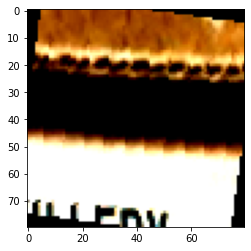

In [12]:

#step 5
img, label = dataset[12]
show_sample(img, label)
print("completed step 5")



In [13]:
#step 6
random_seed = 42
torch.manual_seed(random_seed)
print("completed step 6")


completed step 6


In [14]:

#step 7
train_ds, val_ds, test_ds = random_split(dataset, [1593, 176, 758])
len(train_ds), len(val_ds), len(test_ds)
print("completed step 7")


completed step 7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: plastic (Class No: 4)


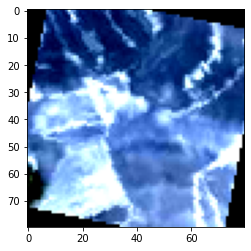

In [15]:
# just checking

img, label = test_ds[12]
show_sample(img, label)

In [16]:

#step 8
from torch.utils.data.dataloader import DataLoader
batch_size = 32
print("completed step 8")


completed step 8


In [17]:

def get_mean_std(loader):
    channels_sum, channels_squared_sum,num_batches = 0,0,0
    
    for data,_ in loader:
        channels_sum += torch.mean(data,dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2,dim=[0,2,3])
        num_batches+=1
    
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches-mean**2)**0.5
    return mean,std
  

"""
normalization is applied to the test/validation-set 
if it has been applied to the training set. 
The important point is, 
that the parameters of this normalization 
have been calculated on the training data only 
and not on the whole set

"""

'\nnormalization is applied to the test/validation-set \nif it has been applied to the training set. \nThe important point is, \nthat the parameters of this normalization \nhave been calculated on the training data only \nand not on the whole set\n\n'

In [18]:


#step 9
#Training and Validation part
train_dl = DataLoader(train_ds, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers = 4, pin_memory = True)
print("completed step 9")


completed step 9


In [19]:
#data = next(iter(train_dl))
#mean_dl = data[0].mean()
#std_dl = data[0].std()

#print("Mean : ",mean_dl)
#print("Standard Deviation : ",std_dl)


mean,std = get_mean_std(train_dl)
print("Mean : ",mean)
print("Standard Deviation : ",std)

########## REFERENCE  ################
"""
Mean :  tensor([0.6752, 0.6417, 0.6062])
Standard Deviation :  tensor([0.2042, 0.2051, 0.2276])
"""

Mean :  tensor([0.0308, 0.0376, 0.0568])
Standard Deviation :  tensor([1.2096, 1.1659, 1.1500])


'\nMean :  tensor([0.6752, 0.6417, 0.6062])\nStandard Deviation :  tensor([0.2042, 0.2051, 0.2276])\n'

In [20]:
#after running the above cell start again from beginning

In [21]:

#step 10
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

print("completed step 10")


completed step 10


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


completed step 11


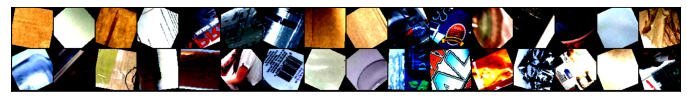

In [22]:

#step 11
show_batch(train_dl)
print("completed step 11")

In [23]:
#step 12
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        """
        F.poisson_nll_loss
        F.cross_entropy
        F.gaussian_nll_loss
        F.kl_div
        F.nll_loss
        """
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    
    def epoch_end(self, epoch, result):
        print("Epoch {}: train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch+1, result['train_loss'], result['val_loss'], result['val_acc']))
        
print("step 12 completed")

step 12 completed


In [24]:
#step 13

class ResNet(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)
        # Replace last layer
        num_ftrs = self.network.fc.in_features
        self.network.fc = nn.Linear(num_ftrs, len(dataset.classes))
    
    def forward(self, xb):
        return torch.sigmoid(self.network(xb))

model = ResNet()

#softmax()
print("step 13 completed")

step 13 completed


In [57]:
#step 14
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (type(list),type(tuple))):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

    
    
print("step 14 completed")

step 14 completed


In [26]:
#step 15

device = get_default_device()
print(device)
print("step 15 completed")

cpu
step 15 completed


In [27]:
#step 16
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)
print(to_device(model, device))
print("step 16 completed")

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

In [28]:
#step 17
#training the model

@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

print("step 17 completed")

step 17 completed


In [29]:
model = to_device(ResNet(), device)

print("step 18 completed")

step 18 completed


In [30]:
evaluate(model, val_dl)

print("step 19 completed")

step 19 completed


In [31]:
%%time
num_epochs = 10
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")

#2 hrs 

Epoch 1: train_loss: 1.6266, val_loss: 1.5053, val_acc: 0.5694
Epoch 2: train_loss: 1.4427, val_loss: 1.4308, val_acc: 0.6111
Epoch 3: train_loss: 1.3618, val_loss: 1.3790, val_acc: 0.6649
Epoch 4: train_loss: 1.3177, val_loss: 1.3299, val_acc: 0.7066
Epoch 5: train_loss: 1.2828, val_loss: 1.3296, val_acc: 0.7066
Epoch 6: train_loss: 1.2531, val_loss: 1.3113, val_acc: 0.7118
Epoch 7: train_loss: 1.2310, val_loss: 1.3369, val_acc: 0.6979
Epoch 8: train_loss: 1.2112, val_loss: 1.2854, val_acc: 0.7569
Epoch 9: train_loss: 1.1946, val_loss: 1.2899, val_acc: 0.7344
Epoch 10: train_loss: 1.1909, val_loss: 1.2917, val_acc: 0.7292
step 20 completed
CPU times: total: 1h 21min 11s
Wall time: 22min 41s


In [32]:
%%time
num_epochs = 10
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")


Epoch 1: train_loss: 1.1911, val_loss: 1.3143, val_acc: 0.7222
Epoch 2: train_loss: 1.1658, val_loss: 1.2886, val_acc: 0.7205
Epoch 3: train_loss: 1.1686, val_loss: 1.2860, val_acc: 0.7535
Epoch 4: train_loss: 1.1531, val_loss: 1.2692, val_acc: 0.7622
Epoch 5: train_loss: 1.1524, val_loss: 1.2831, val_acc: 0.7083
Epoch 6: train_loss: 1.1452, val_loss: 1.2833, val_acc: 0.7188
Epoch 7: train_loss: 1.1267, val_loss: 1.3069, val_acc: 0.7049
Epoch 8: train_loss: 1.1289, val_loss: 1.2814, val_acc: 0.7326
Epoch 9: train_loss: 1.1284, val_loss: 1.2601, val_acc: 0.7674
Epoch 10: train_loss: 1.1316, val_loss: 1.2555, val_acc: 0.7674
step 20 completed
CPU times: total: 1h 17min 48s
Wall time: 21min 31s


In [33]:
%%time
num_epochs = 10
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")

Epoch 1: train_loss: 1.1301, val_loss: 1.2799, val_acc: 0.7413
Epoch 2: train_loss: 1.1204, val_loss: 1.2853, val_acc: 0.7396
Epoch 3: train_loss: 1.1109, val_loss: 1.2787, val_acc: 0.7309
Epoch 4: train_loss: 1.1111, val_loss: 1.2470, val_acc: 0.7969
Epoch 5: train_loss: 1.1067, val_loss: 1.2486, val_acc: 0.7830
Epoch 6: train_loss: 1.1049, val_loss: 1.2532, val_acc: 0.7309
Epoch 7: train_loss: 1.0945, val_loss: 1.2636, val_acc: 0.7431
Epoch 8: train_loss: 1.0933, val_loss: 1.2572, val_acc: 0.7639
Epoch 9: train_loss: 1.0966, val_loss: 1.2780, val_acc: 0.7569
Epoch 10: train_loss: 1.1021, val_loss: 1.2643, val_acc: 0.7639
step 20 completed
CPU times: total: 1h 19min 3s
Wall time: 21min 50s


In [34]:
%%time
num_epochs = 10
opt_func = torch.optim.Adam
lr = 5.5e-5

history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

print("step 20 completed")

Epoch 1: train_loss: 1.1031, val_loss: 1.2951, val_acc: 0.7153
Epoch 2: train_loss: 1.0982, val_loss: 1.2564, val_acc: 0.7743
Epoch 3: train_loss: 1.0909, val_loss: 1.2684, val_acc: 0.7344
Epoch 4: train_loss: 1.0935, val_loss: 1.2402, val_acc: 0.7760
Epoch 5: train_loss: 1.0956, val_loss: 1.2795, val_acc: 0.7222
Epoch 6: train_loss: 1.0837, val_loss: 1.2873, val_acc: 0.7240
Epoch 7: train_loss: 1.0864, val_loss: 1.2960, val_acc: 0.7101
Epoch 8: train_loss: 1.0848, val_loss: 1.2385, val_acc: 0.7604
Epoch 9: train_loss: 1.0904, val_loss: 1.2918, val_acc: 0.7274
Epoch 10: train_loss: 1.0855, val_loss: 1.2831, val_acc: 0.7378
step 20 completed
CPU times: total: 1h 19min 29s
Wall time: 23min 2s


step 21 completed


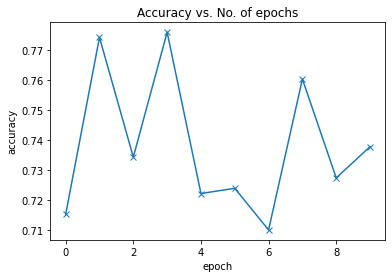

In [35]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

plot_accuracies(history)

print("step 21 completed")

None
step 22 completed


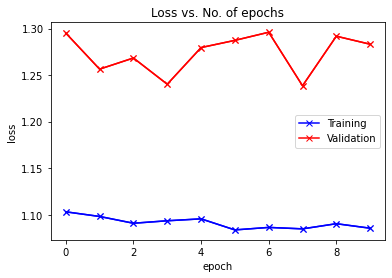

In [36]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)
print(plot_losses(history))

print("step 22 completed")

In [37]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    prob, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: metal , Predicted: metal


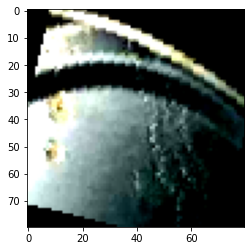

In [38]:
img, label = test_ds[17]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: glass , Predicted: glass


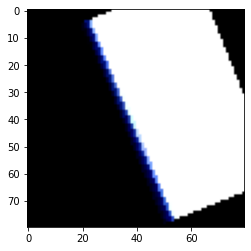

In [39]:
img, label = test_ds[23]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: plastic , Predicted: plastic


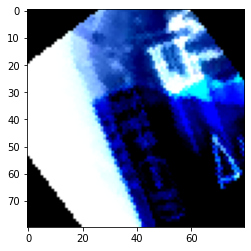

In [40]:
img, label = test_ds[51]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [41]:
#Predicting External Images
#refer https://www.kaggle.com/sudarshansrinivasan/garbage-classify-95-accuracy-scr-p-2
#model accuracy calculation  

print(len(train_ds))
print(len(val_ds)) 
print(len(test_ds))

1593
176
758


In [42]:
loaded_model = model


In [58]:
from PIL import Image
from pathlib import Path

def predict_external_image(image_name):
    image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/' + image_name))

    example_image = transformations(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")
"""
def predict():
    
    #predictions = [predict_image(x,loaded_model) for x in test_ds]
    for y in range(0,len(test_ds)):
        img, label = test_ds[y]
        show_sample(img, label)
        
        #predictions[y] = predict_image(img, loaded_model)
        print("The image resembles", predict_image(img, loaded_model) + ".")
        #print(predictions[y])
        
    #return predictions

"""  

'\ndef predict():\n    \n    #predictions = [predict_image(x,loaded_model) for x in test_ds]\n    for y in range(0,len(test_ds)):\n        img, label = test_ds[y]\n        show_sample(img, label)\n        \n        #predictions[y] = predict_image(img, loaded_model)\n        print("The image resembles", predict_image(img, loaded_model) + ".")\n        #print(predictions[y])\n        \n    #return predictions\n\n'

In [44]:
#predict()
#error

In [45]:
#predict_image(test_ds[12], loaded_model)
#error
img, label = test_ds[12]
print(label)
print(dataset.classes[label])

4
plastic


In [46]:
#predict()

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

In [47]:
def accuracy_calculation():
    #x = ['']*len(test_ds)
    #xp = ['']*len(test_ds)
    x=[]
    xp=[]
    correct_prediction_count = 0
    incorrect_prediction_count = 0
    waste_types = ['cardboard','glass','metal','paper','plastic','trash']
    #predictions = [predict_image(x,loaded_model) for x in test_ds]
    for y in range(0,len(test_ds)):
        img, label = test_ds[y]
        #show_sample(img, label)
        actual = dataset.classes[label]
        prediction = predict_image(img, model)
        #print("The image resembles", predict_image(img, loaded_model) + ".")
        #print(predictions[y])
        x.append(actual)
        xp.append(prediction)
        if(actual == prediction):
            correct_prediction_count = correct_prediction_count+1
        else:
            incorrect_prediction_count = incorrect_prediction_count+1
        
    accuracy = (correct_prediction_count/len(test_ds))*100
    print("correct_prediction_count : ",correct_prediction_count)
    print("incorrect_prediction_count : ",incorrect_prediction_count)
    print("total test data : ",len(test_ds))
    print("Accuracy : ",accuracy)
    
    
    
    cm = confusion_matrix(x,xp)
    print("Confusion matrix : ")
    print(cm)
    
    df_cm = pd.DataFrame(cm,waste_types,waste_types)

    plt.figure(figsize=(10,8))
    sns.heatmap(df_cm,annot=True,fmt="d",cmap="YlGnBu")
    

correct_prediction_count :  582
incorrect_prediction_count :  176
total test data :  758
Accuracy :  76.78100263852242
Confusion matrix : 
[[ 93   2   4  11   3   0]
 [  2 117   5  10   7   3]
 [  0  16  94   4  11   4]
 [  9   2   6 147   6   5]
 [  2  15  10  15 107   0]
 [  6   3   4   6   5  24]]


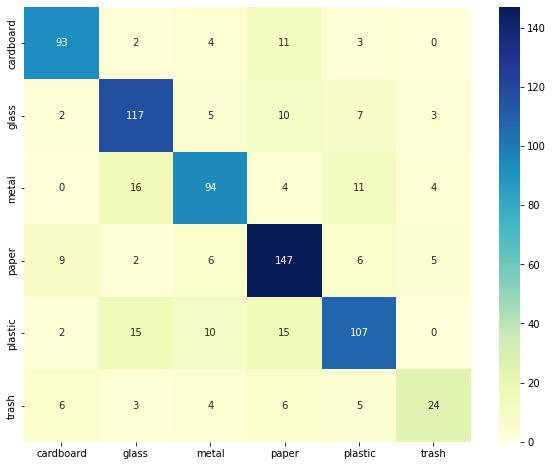

In [48]:
accuracy_calculation()

In [49]:
data_dir  = 'C:/Users/rajam/OneDrive/Desktop/imgdataset/Garbage classification/Garbage classification'

categories = os.listdir(data_dir)
print(categories)



for i in categories:
    list = os.listdir(data_dir+"/"+i) 
    number_files = len(list)
    print(" ",i," : ",number_files)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
  cardboard  :  403
  glass  :  501
  metal  :  410
  paper  :  594
  plastic  :  482
  trash  :  137


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


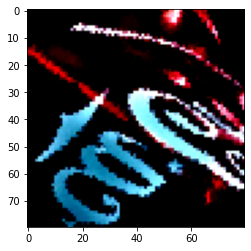

In [59]:
predict_external_image('tincan.jpg')

In [ ]:
torch.save(loaded_model.state_dict(),'C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


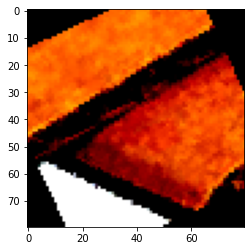

In [60]:
predict_external_image('cardboard.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


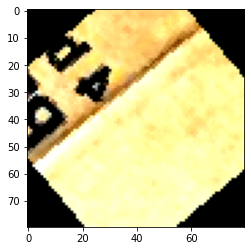

In [61]:
predict_external_image('cardboard3.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


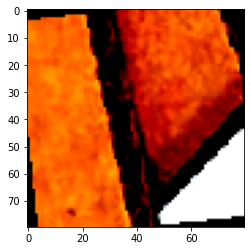

In [68]:
predict_external_image('cb1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles paper.


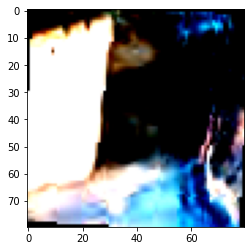

In [69]:
predict_external_image('glass.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


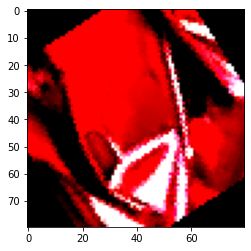

In [70]:
predict_external_image('tin1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


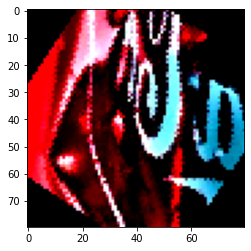

In [71]:
predict_external_image('tin2.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


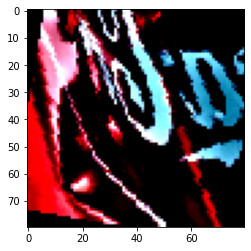

In [72]:
predict_external_image('tincan.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles glass.


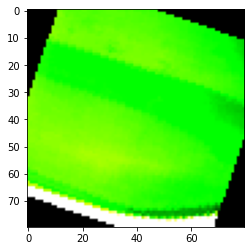

In [73]:
predict_external_image('wine_bottle.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles glass.


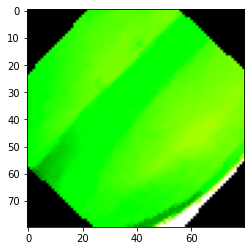

In [74]:
predict_external_image('wine_bottle1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


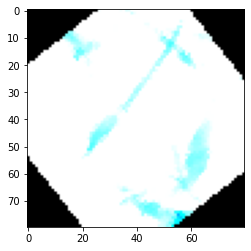

In [75]:
predict_external_image('plastic1.jpg')

In [76]:
trans_test = transforms.Compose([
     transforms.Resize((300, 300)),
     transforms.ToTensor(),
     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
     ])


In [77]:


def predict_external_image1(image_name):
    image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/' + image_name))

    example_image = trans_test(image)
    plt.imshow(example_image.permute(1, 2, 0))
    print("The image resembles", predict_image(example_image, loaded_model) + ".")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles paper.


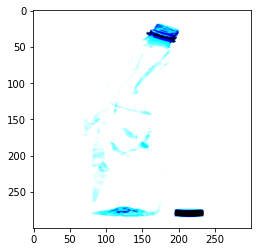

In [78]:
predict_external_image1('plastic1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles glass.


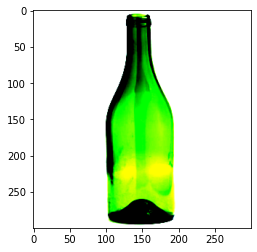

In [79]:
predict_external_image1('wine_bottle1.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


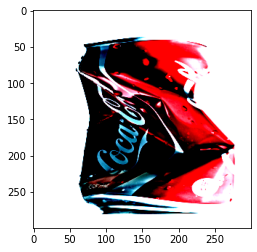

In [80]:
predict_external_image1('tincan.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


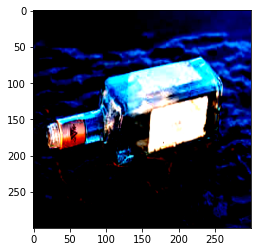

In [81]:
predict_external_image1('glass.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


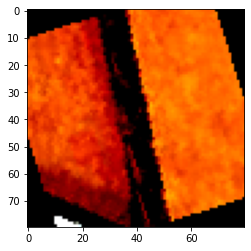

In [82]:
predict_external_image('cb1.jpg')

In [97]:
PATH = 'C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/model.pth'

torch.save(loaded_model.state_dict(), PATH)

In [100]:

#the_model = TheModelClass(*args, **kwargs)
the_model = ResNet()

the_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [105]:
the_model.eval()
#must r

ResNet(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


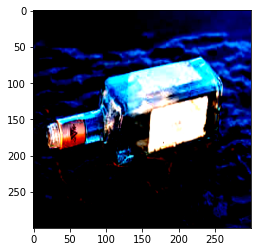

In [106]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/glass.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


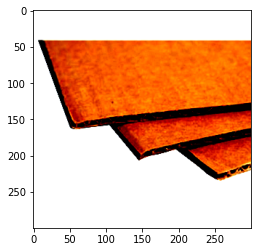

In [107]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/cb1.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles cardboard.


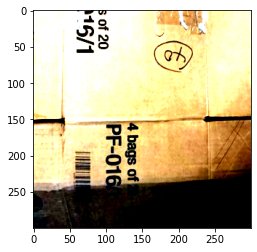

In [108]:
#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/cardboard3.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The image resembles metal.


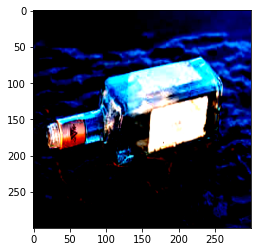

In [109]:


#def predict_external_image1(image_name):
image = Image.open(Path('C:/Users/rajam/OneDrive/Desktop/college project/Code/projectreview1/images/glass.jpg'))

example_image = trans_test(image)
plt.imshow(example_image.permute(1, 2, 0))
print("The image resembles", predict_image(example_image, the_model) + ".")
